# Analysis Objective
    
: Predict the number of injured, when the 100 accidents/month occur in Jongno-gu.

## Data cleanup

### Load Seoul Accident Data

- Accident: The Number of Accidents  
- Death: The Number of Deaths
- Injured: The Number of Injured

In [21]:
seoul <- read.csv("./Data/SeoulAccident.csv", fileEncoding = "CP949", encoding = "UTF-8")
head(seoul)

,Year,Month,District,Accident,Deaths,Injured
,<int>,<int>,<fct>,<int>,<int>,<int>
1,2011,1,Jongno,115,2,165
2,2011,2,Jongno,99,0,134
3,2011,3,Jongno,116,0,162
4,2011,4,Jongno,110,1,153
5,2011,5,Jongno,122,0,157
6,2011,6,Jongno,116,3,163


In [22]:
str(seoul)

'data.frame':	2100 obs. of  6 variables:
 $ Year    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ District: Factor w/ 25 levels "Dobong","Dongdaemun",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ Accident: int  115 99 116 110 122 116 103 122 121 135 ...
 $ Deaths  : int  2 0 0 1 0 3 1 1 2 2 ...
 $ Injured : int  165 134 162 153 157 163 154 171 166 193 ...


In [23]:
summary(seoul)

      Year          Month             District       Accident    
 Min.   :2011   Min.   : 1.00   Dobong    :  84   Min.   : 45.0  
 1st Qu.:2012   1st Qu.: 3.75   Dongdaemun:  84   1st Qu.:101.0  
 Median :2014   Median : 6.50   Dongjak   :  84   Median :123.0  
 Mean   :2014   Mean   : 6.50   Eunpyeong :  84   Mean   :134.2  
 3rd Qu.:2016   3rd Qu.: 9.25   Gangbuk   :  84   3rd Qu.:151.0  
 Max.   :2017   Max.   :12.00   Gangdong  :  84   Max.   :378.0  
                                (Other)   :1596                  
     Deaths          Injured     
 Min.   : 0.000   Min.   : 55.0  
 1st Qu.: 0.000   1st Qu.:141.0  
 Median : 1.000   Median :171.0  
 Mean   : 1.288   Mean   :189.7  
 3rd Qu.: 2.000   3rd Qu.:213.0  
 Max.   :10.000   Max.   :552.0  
                                 

In [24]:
cor(seoul$Accident, seoul$Injured)

# almost strong positive correlation between Accident and Injured

[1] 0.9796363

In [25]:
# c.f. 
cor(seoul$Accident, seoul$Deaths)

# almost no correlation between Accident and Deaths

[1] 0.2295247

### Create a subset data w.r.t. Jongno

In [26]:
Jongno <- subset(seoul, District =="Jongno")
head(Jongno, 15)

,Year,Month,District,Accident,Deaths,Injured
,<int>,<int>,<fct>,<int>,<int>,<int>
1,2011,1,Jongno,115,2,165
2,2011,2,Jongno,99,0,134
3,2011,3,Jongno,116,0,162
4,2011,4,Jongno,110,1,153
5,2011,5,Jongno,122,0,157
6,2011,6,Jongno,116,3,163
7,2011,7,Jongno,103,1,154
8,2011,8,Jongno,122,1,171
9,2011,9,Jongno,121,2,166


### Reset the rownames

In [29]:
rownames(Jongno) <- c(NULL) # Alternatively, <- c()
head(Jongno, 15)

,Year,Month,District,Accident,Deaths,Injured
,<int>,<int>,<fct>,<int>,<int>,<int>
1,2011,1,Jongno,115,2,165
2,2011,2,Jongno,99,0,134
3,2011,3,Jongno,116,0,162
4,2011,4,Jongno,110,1,153
5,2011,5,Jongno,122,0,157
6,2011,6,Jongno,116,3,163
7,2011,7,Jongno,103,1,154
8,2011,8,Jongno,122,1,171
9,2011,9,Jongno,121,2,166


##  Linear Regression Analysis

In [82]:
cor(Jongno$Accident, Jongno$Injured)

# The subset data still shows strong positive correlations.

[1] 0.9078793


Call:
lm(formula = Jongno$Injured ~ Jongno$Accident)

Coefficients:
    (Intercept)  Jongno$Accident  
          9.342            1.307  


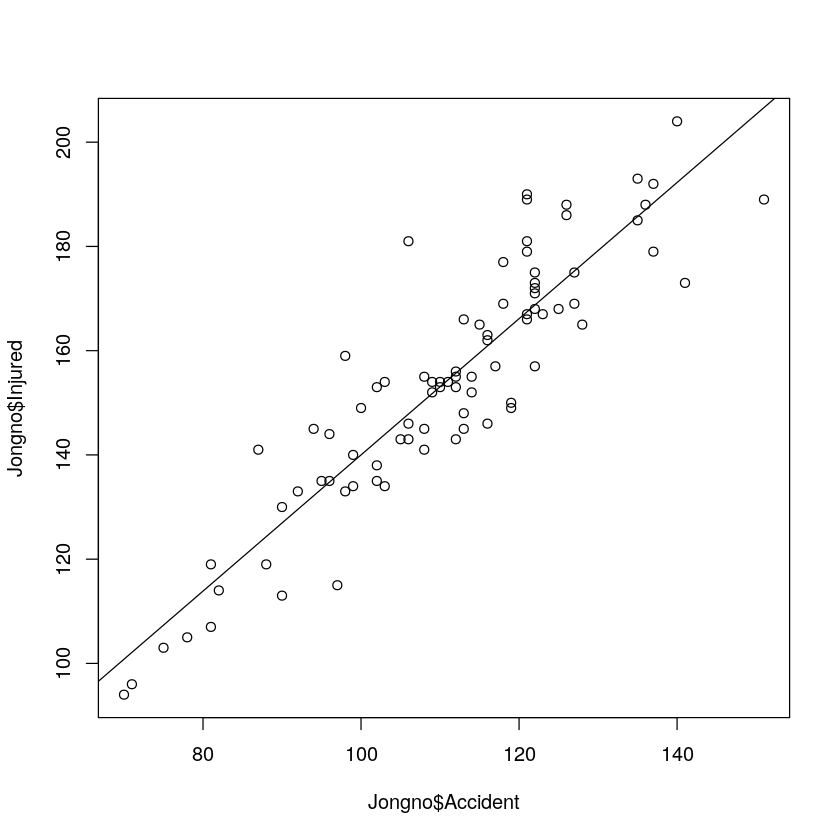

In [38]:
plot(Jongno$Injured ~ Jongno$Accident)
reg <- lm(Jongno$Injured ~ Jongno$Accident)
reg
abline(reg)

In [36]:
summary(reg)

# The accuracy of regression model is 82.2%


Call:
lm(formula = Jongno$Injured ~ Jongno$Accident)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.084  -6.149  -0.410   4.756  33.156 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.34192    7.44736   1.254    0.213    
Jongno$Accident  1.30662    0.06663  19.610   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.08 on 82 degrees of freedom
Multiple R-squared:  0.8242,	Adjusted R-squared:  0.8221 
F-statistic: 384.6 on 1 and 82 DF,  p-value: < 2.2e-16


In [80]:
accident = 100
InjuredJongno = 9.342 + 1.307*accident

InjuredJongno 

# Hence, if 100 accidents occur in Jongno per month, 
#  approx. 140 injured people are anticipated.

# Accuracy of Regression Model is 82.2%.

[1] 140.042

### cf. randomForest

In [33]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [34]:
head(Jongno)

,Year,Month,District,Accident,Deaths,Injured
,<int>,<int>,<fct>,<int>,<int>,<int>
1,2011,1,Jongno,115,2,165
2,2011,2,Jongno,99,0,134
3,2011,3,Jongno,116,0,162
4,2011,4,Jongno,110,1,153
5,2011,5,Jongno,122,0,157
6,2011,6,Jongno,116,3,163


In [40]:
randForest <- randomForest(Jongno$Injured ~ Jongno$Accident, data = Jongro, tree = 100)
randForest


Call:
 randomForest(formula = Jongno$Injured ~ Jongno$Accident, data = Jongro,      tree = 100) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 133.9886
                    % Var explained: 76.24

**Note:**
- randomForest only has 76.24% accuracy, which is quite lower than simple linear regress model.

- Given Injured and Accident data shows strong correlations, simple regression can show relatively accurate model.

- So, we can run different models and compare the accuracy, and use the better one.